In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline

### Problem 2.1

When $n=1$, we can fit a degree-$m$ polynomial by choosing $f_{j}(x)=x^{j-1}$ and $M=m+1$. 
In this case, it follows that $A_{i,j}=x_{i}^{j-1}$
and the matrix $A$ is called a Vandermonde matrix.

Write a function to create Vandermonde matrix **(5pt)**

In [2]:
def create_vandermonde(x, m):
    """
    Arguments:
        x {numpy.ndarray} -- 1d-array of (x_1, x_2, ..., x_n)
        m {int} -- a non-negative integer, degree of polynomial fit
    Returns:
        A {numpy.ndarray} -- an n x (m+1) matrix where A_{ij} = x_i^{j-1}
    """
    A=np.zeros((x.shape[0],m+1))
    for i in range(x.shape[0]):
        for j in range(m+1):
            A[i,j]=x[i]**j
    return A

x = np.arange(1, 10)
create_vandermonde(x, 3)

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.],
       [  1.,   7.,  49., 343.],
       [  1.,   8.,  64., 512.],
       [  1.,   9.,  81., 729.]])

### Problem 2.2

Write a function to solve least-square problem **(5pt)**

Implementation hint: check `numpy.linalg.lstsq`.

In [3]:
def solve_linear_LS(A, y):
    """
    Arguments:
        A {numpy.ndarray} -- an m x n matrix
        y {numpy.ndarray} -- a length-n vector
    Returns:
        z_hat {numpy.ndarray} -- length-m vector, the optimal solution for the given linear least-square problem
    """
    z_hat=np.linalg.lstsq(A, y)[0]
    return z_hat

Using the setup in the previous example, try fitting the points $(1,2),(2,3),(3,5),(4,7),(5,11),(6,13)$
to a degree-2 polynomial.

Compute the minimum squared error. **(5pt)**

Plot this polynomial (for $x\in[0,7]$) along with the data points to see the quality of fit. **(5pt)**

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


best polynomial fit is 0.2321 x^2 + 0.6893 x^1 + 0.9000
minimum squared error is 1.0929


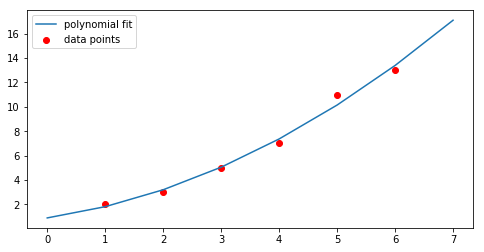

In [4]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 3, 5, 7, 11, 13])
m = 2

# Create Vandermonde matrix A
A = create_vandermonde(x,m)

# Solve least square problem to minimize || y - A z ||^2
z_hat = solve_linear_LS(A, y)

# Compute the minimum square error
mse = np.linalg.norm(np.subtract(y,A.dot(z_hat.T)))**2

# Generate plot points for the fitted polynomial
xx = np.arange(0,8)
yy = create_vandermonde(xx,m).dot(z_hat.T).T

plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='red', label='data points')
plt.plot(xx, yy, label='polynomial fit')
plt.legend()

poly_expr = ' + '.join(['{0:.4f} x^{1}'.format(v, i) for i, v in enumerate(z_hat)][::-1])[:-4]
print('best polynomial fit is {0}'.format(poly_expr))
print('minimum squared error is {0:.4f}'.format(mse))

### Problem 3.2

Read `mnist_train.csv`, create a dataframe with two columns, column `feature` contains all $x$ and column `label` contains all $y$

In [5]:
# read mnist csv file to a dataframe
df = pd.read_csv('mnist_train.csv')

# append feature column by merging all pixel columns
df['feature'] = df.apply(lambda row: row.values[1:], axis=1)

# only keep feature and label column
df = df[['feature', 'label']]

# display first 5 rows of the dataframe
df.head()

,feature,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


Plot the first 30 images

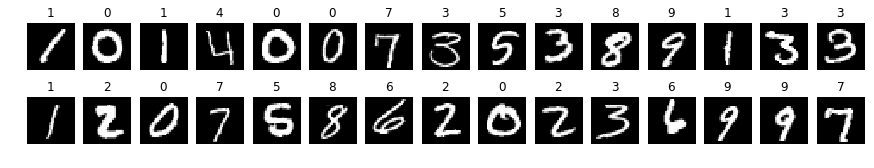

In [6]:
plt.figure(figsize=(15, 2.5))
for i, row in df.iloc[:30].iterrows():
    x, y = row['feature'], row['label']
    plt.subplot(2, 15, i + 1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(y)

Extract the all samples labeled with digit $n$ and randomly separate the samples into equal-sized training and testing groups. **(10pt)**

In [7]:
from sklearn.model_selection import train_test_split
def extract_and_split(df, d, test_size=0.5):
    """
    extract the samples with given lables and randomly separate the samples into equal-sized training and testing groups, extend each vector to length 785 by appending a −1
    Arguments:
        df {dataframe} -- the dataframe of MNIST dataset
        d {int} -- digit needs to be extracted, can be 0, 1, ..., 9
        test_size {float} -- the fraction of testing set, default value is 0.5
    Returns:
        X_tr {numpy.ndarray} -- training set features, a matrix with 785 columns
                                each row corresponds the feature of a sample
        y_tr {numpy.ndarray} -- training set labels, 1d-array
                                each element corresponds the label of a sample
        X_te {numpy.ndarray} -- testing set features, a matrix with 785 columns 
                                each row corresponds the feature of a sample
        y_te {numpy.ndarray} -- testing set labels, 1d-array
                                each element corresponds the label of a sample
    """
    df_d=df.loc[df['label']==d]   #extract digit d
    X=df_d['feature']
    y=df_d['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    X_train=X_train.values   #convert datafram to array
    X_test=X_test.values
    y_train=y_train.values
    y_test=y_test.values
    
    X_tr=np.zeros((X_train.shape[0],784))
    y_tr=np.zeros(y_train.shape[0])
    for i in range(X_train.shape[0]):
        for j in range(784):
            X_tr[i,j]=X_train[i][j]
    for i in range(y_train.shape[0]):
        y_tr[i]=y_train[i]
    X_tr=np.insert(X_tr,784,-1,axis=1)
    
    X_te=np.zeros((X_test.shape[0],784))
    y_te=np.zeros(y_test.shape[0])
    for i in range(X_test.shape[0]):
        for j in range(784):
            X_te[i,j]=X_test[i][j]
    for i in range(y_test.shape[0]):
        y_te[i]=y_test[i]
    X_te=np.insert(X_te,784,-1,axis=1)
    return X_tr, X_te, y_tr, y_te

A useful preprocess function before you draw histogram.
Sometimes your histogram becomes ugly because of the existence of outlier points.
The function below drops the unwanted outlier points, please call this function before you pass your result to draw a histogram.

In [8]:
def remove_outlier(x, thresh=3.5):
    """
    returns points that are not outliers to make histogram prettier
    reference: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting/11886564
    Arguments:
        x {numpy.ndarray} -- 1d-array, points to be filtered
        thresh {float} -- the modified z-score to use as a threshold. Observations with
                          a modified z-score (based on the median absolute deviation) greater
                          than this value will be classified as outliers.
    Returns:
        x_filtered {numpy.ndarray} -- 1d-array, filtered points after dropping outlier
    """
    if len(x.shape) == 1: x = x[:,None]
    median = np.median(x, axis=0)
    diff = np.sqrt(((x - median)**2).sum(axis=-1))
    modified_z_score = 0.6745 * diff / np.median(diff)
    x_filtered = x[modified_z_score <= thresh]
    return x_filtered

Pairwise experiment for applying least-square to classify digit $a$ and digit $b$. 

Follow the given steps in the template and implement the function for pairwise experiment **(25pt)**

In [12]:
def mnist_pairwise_LS(df, a, b, test_size=0.5, verbose=False):
    """
    Pairwise experiment for applying least-square to classify digit a and digit b
    Arguments:
        df {dataframe} -- the dataframe of MNIST dataset
        a, b {int} -- digits to be classified
        test_size {float} -- the fraction of testing set, default value is 0.5
        verbose {bool} -- whether to print and plot results
    Returns:
        res {numpy.ndarray} -- numpy.array([traing error, testing error])
    """
    # Find all samples labeled with digit a and split into train/test sets
    Xa_tr, Xa_te, ya_tr, ya_te = extract_and_split(df, a, test_size)
    # Find all samples labeled with digit b and split into train/test sets
    Xb_tr, Xb_te, yb_tr, yb_te = extract_and_split(df, b, test_size)
    
    for i in range(ya_tr.shape[0]):
        ya_tr[i]=-1;

    for i in range(ya_te.shape[0]):
        ya_te[i]=-1;
        
    for i in range(yb_tr.shape[0]):
        yb_tr[i]=1;

    for i in range(yb_te.shape[0]):
        yb_te[i]=1;  

    # Construct the full training set
    X_tr = np.concatenate((Xa_tr, Xb_tr), axis=0)
    y_tr = np.concatenate((ya_tr, yb_tr), axis=0)
    
    # Construct the full testing set
    X_te = np.concatenate((Xa_te, Xb_te), axis=0)
    y_te = np.concatenate((ya_te, yb_te), axis=0)
    
    # Run least-square on training set
    z_hat = solve_linear_LS(X_tr, y_tr)
    
    # Compute estimation and misclassification on training set
    y_hat_tr = X_tr.dot(z_hat)
    for i in range(y_hat_tr.shape[0]):
        if y_hat_tr[i]>=0:
            y_hat_tr[i]=1
        else:
            y_hat_tr[i]=-1
    
    cm_tr=np.array([[0,0],[0,0]])
    
    for i in range(y_hat_tr.shape[0]):
        if (y_tr[i]==-1 and y_hat_tr[i]==-1):
            cm_tr[0,0]=cm_tr[0,0]+1
        elif (y_tr[i]==-1 and y_hat_tr[i]==1):
            cm_tr[0,1]=cm_tr[0,1]+1
        elif (y_tr[i]==1 and y_hat_tr[i]==-1):
            cm_tr[1,0]=cm_tr[1,0]+1
        elif (y_tr[i]==1 and y_hat_tr[i]==1):
            cm_tr[1,1]=cm_tr[1,1]+1
            
    err_tr = (cm_tr[0,1]+cm_tr[1,0])/y_hat_tr.shape[0]
    
    # Compute estimation and misclassification on training set
    y_hat_te = X_te.dot(z_hat)
    for i in range(y_hat_te.shape[0]):
        if y_hat_te[i]>=0:
            y_hat_te[i]=1
        else:
            y_hat_te[i]=-1
    
    cm_te=np.array([[0,0],[0,0]])
    
    for i in range(y_hat_te.shape[0]):
        if (y_te[i]==-1 and y_hat_te[i]==-1):
            cm_te[0,0]=cm_te[0,0]+1
        elif (y_te[i]==-1 and y_hat_te[i]==1):
            cm_te[0,1]=cm_te[0,1]+1
        elif (y_te[i]==1 and y_hat_te[i]==-1):
            cm_te[1,0]=cm_te[1,0]+1
        elif (y_te[i]==1 and y_hat_te[i]==1):
            cm_te[1,1]=cm_te[1,1]+1
    
    err_te = (cm_te[0,1]+cm_te[1,0])/y_hat_te.shape[0]
    
    if verbose:
        print('Pairwise experiment, mapping {0} to -1, mapping {1} to 1'.format(a, b))
        print('training error = {0:.2f}%, testing error = {1:.2f}%'.format(100 * err_tr, 100 * err_te))
        
        # Compute confusion matrix
        print('Confusion matrix_test:\n {0}'.format(cm_te))
        print('Confusion matrix_train:\n {0}'.format(cm_tr))

        # Compute the histogram of the function output separately for each class 
        # Then plot the two histograms together
        ya_te_hat, yb_te_hat = Xa_te.dot(z_hat), Xb_te.dot(z_hat)
        output = [remove_outlier(ya_te_hat), remove_outlier(yb_te_hat)]
        plt.figure(figsize=(8, 4))
        plt.hist(output, bins=50)
    
    res = np.array([err_tr, err_te])
    return res

Pairwise experiment for applying least-square to classify digit $0$ and digit $1$.

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


Pairwise experiment, mapping 0 to -1, mapping 1 to 1
training error = 0.32%, testing error = 1.59%
Confusion matrix_test:
 [[2037   29]
 [  41 2301]]
Confusion matrix_train:
 [[2062    4]
 [  10 2332]]


array([0.00317604, 0.01588022])

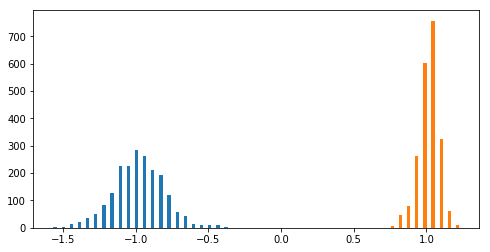

In [13]:
mnist_pairwise_LS(df, 0, 1, verbose=True)

### Problem 3.3

Repeat the above problem for all pairs of digits. For each pair of digits, report the classification error rates for the training and testing sets. The error rates can be formatted nicely into a triangular matrix. **(15pt)**

For example, you can put all testing error in the lower triangle and all training error in the upper triangle.
You may run the classification several times to get an average error rate over different sample split.

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


[[0.   0.32 0.82 0.4  0.37 1.16 0.68 0.16 0.78 0.38]
 [1.59 0.   0.88 0.8  0.14 0.57 0.18 0.55 1.74 0.34]
 [2.36 2.73 0.   1.92 0.87 1.28 2.29 1.1  2.04 0.67]
 [1.32 2.19 4.24 0.   0.24 2.7  0.33 0.82 2.43 1.24]
 [0.78 1.26 2.35 1.33 0.   0.58 0.29 0.71 0.44 2.15]
 [2.72 1.91 3.44 5.96 2.14 0.   5.22 0.22 2.37 0.73]
 [2.13 1.18 4.47 1.74 1.41 8.04 0.   0.   0.88 0.17]
 [1.01 2.05 3.22 2.12 2.74 1.63 1.15 0.   0.59 2.7 ]
 [1.68 4.28 4.22 4.97 1.4  5.17 2.49 2.22 0.   1.24]
 [1.44 1.31 2.58 2.79 5.01 2.58 0.77 5.29 3.05 0.  ]]


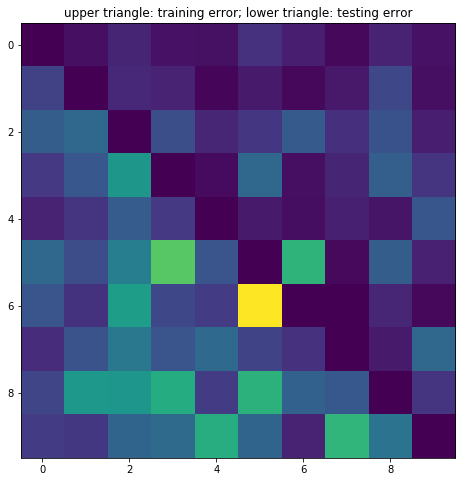

In [14]:
from tqdm import tqdm_notebook as tqdm
num_trial, err_matrix = 1, np.zeros((10, 10))

# Fill the err_matrix, for all a < b
# err_matrix[a, b] = training error between digits a and b
# err_matrix[b, a] = testing error between digits a and b
for i in range(9):
    for j in range(i+1,10):
        err_matrix[i,j]=mnist_pairwise_LS(df, i, j, verbose=False)[0]
        err_matrix[j,i]=mnist_pairwise_LS(df, i, j, verbose=False)[1]

plt.figure(figsize=(8, 8))
plt.imshow(err_matrix)
plt.title('upper triangle: training error; lower triangle: testing error');
print(np.round(err_matrix*100, 2))

### Problem 3.4

But, what about a multi-class classifier for MNIST digits? 
For multi-class linear classification with d classes, one standard approach is to learn a linear mapping $f \colon \mathbb{R}^n \to \mathbb{R}^d $ where the “$y$”-value for the $i$-th class is chosen to be the standard basis vector $ \underline{e}_i \in \mathbb{R}^d $. 
This is sometimes called one-hot encoding. 
Using the same $A$ matrix as before and a matrix $Y$, defined by $Y_{i,j}$ if observation $i$ in class $j$ and $Y_{i,j} = 0$ otherwise, we can solve for the coefficient matrix $Z \in \mathbb{R}^d$ coefficients .
Then, the classifier maps a vector $\underline{x}$ to class $i$ if the $i$-th element of $Z^T \underline{x}$ is the largest element in the vector. 

Follow the given steps in the template and implement the function for multi-class classification experiment **(30pt)**

In [18]:
def mnist_onehot_LS(df, test_size=0.5):
    """
    Experiment for applying least-square to classify all digits using one-hot encoding
    Arguments:
        df {dataframe} -- the dataframe of MNIST dataset
        test_size {float} -- the fraction of testing set, default value is 0.5
    Returns:
        res {numpy.ndarray} -- numpy.array([traing error, testing error])
    """
    X=df['feature']
    y=df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    X_train=X_train.values   #convert datafram to array
    X_test=X_test.values
    y_train=y_train.values
    y_test=y_test.values
    
    '''
    # Split into training/testing set
    tr, te = 
    '''
    
    X_tr=np.zeros((X_train.shape[0],784))
    y_tr=np.zeros(y_train.shape[0])
    for i in range(X_train.shape[0]):
        for j in range(784):
            X_tr[i,j]=X_train[i][j]
    for i in range(y_train.shape[0]):
        y_tr[i]=y_train[i]
    
    X_te=np.zeros((X_test.shape[0],784))
    y_te=np.zeros(y_test.shape[0])
    for i in range(X_test.shape[0]):
        for j in range(784):
            X_te[i,j]=X_test[i][j]
    for i in range(y_test.shape[0]):
        y_te[i]=y_test[i]

    '''
    # Construct the training set
    X_tr = 
    y_tr = 
    
    # Construct the testing set
    X_te = 
    y_te = 
    '''
    
    # Apply one-hot encoding to training labels
    Y = np.zeros((y_tr.shape[0],10))
    for i in range(y_tr.shape[0]):
        for j in range(10):
            if (y_tr[i]==j):
                Y[i,j]=1
    
    
    # Run least-square on training set
    Z = solve_linear_LS(X_tr, Y)
    
    # Compute estimation and misclassification on training set
    Y_hat_tr=X_tr.dot(Z)
    y_hat_tr = Y_hat_tr.argmax(axis=1)
    
    cm_tr=np.zeros((10,10))
    for m in range(y_tr.shape[0]):
        for i in range(10):
            for j in range(10):
                if (y_tr[m]==i and y_hat_tr[m]==j):
                    cm_tr[i,j]=cm_tr[i,j]+1
    err_tr = 0
    for i in range(10):
        for j in range(10):
            if i!=j:
                err_tr=err_tr+cm_tr[i,j]
    err_tr=err_tr/y_tr.shape[0]
    
    # Compute estimation and misclassification on training set
    Y_hat_te=X_te.dot(Z)
    y_hat_te = Y_hat_te.argmax(axis=1)
    
    cm_te=np.zeros((10,10))
    for m in range(y_te.shape[0]):
        for i in range(10):
            for j in range(10):
                if (y_te[m]==i and y_hat_te[m]==j):
                    cm_te[i,j]=cm_te[i,j]+1
    
    err_te = 0
    for i in range(10):
        for j in range(10):
            if i!=j:
                err_te=err_te+cm_te[i,j]
    err_te=err_te/y_te.shape[0]
    
    print('training error = {0:.2f}%, testing error = {1:.2f}%'.format(100 * err_tr, 100 * err_te))
    # Compute confusion matrix
    print('Confusion matrix_test:\n {0}'.format(cm_te))
    print('Confusion matrix_train:\n {0}'.format(cm_tr))
    return np.array([err_tr, err_te])

In [19]:
mnist_onehot_LS(df)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


training error = 13.85%, testing error = 15.81%
Confusion matrix_test:
 [[1.962e+03 5.000e+00 8.000e+00 5.000e+00 9.000e+00 1.400e+01 3.200e+01
  1.000e+00 2.600e+01 2.000e+00]
 [1.000e+00 2.275e+03 1.500e+01 9.000e+00 8.000e+00 6.000e+00 1.000e+01
  3.000e+00 2.400e+01 4.000e+00]
 [3.200e+01 8.300e+01 1.694e+03 6.500e+01 4.700e+01 8.000e+00 8.700e+01
  3.400e+01 7.200e+01 1.000e+01]
 [9.000e+00 5.100e+01 6.900e+01 1.824e+03 1.200e+01 4.200e+01 2.000e+01
  4.800e+01 5.700e+01 5.900e+01]
 [7.000e+00 3.300e+01 1.700e+01 5.000e+00 1.755e+03 2.600e+01 2.000e+01
  8.000e+00 3.100e+01 1.240e+02]
 [5.300e+01 2.700e+01 1.100e+01 2.060e+02 3.000e+01 1.280e+03 6.200e+01
  1.300e+01 1.650e+02 4.700e+01]
 [4.400e+01 2.900e+01 2.400e+01 1.000e+00 2.200e+01 3.300e+01 1.905e+03
  0.000e+00 1.800e+01 1.000e+00]
 [2.400e+01 5.800e+01 3.600e+01 2.200e+01 4.900e+01 5.000e+00 2.000e+00
  1.865e+03 1.100e+01 1.190e+02]
 [2.300e+01 1.540e+02 2.200e+01 8.900e+01 5.000e+01 8.700e+01 3.000e+01
  6.000e+00 1.47

array([0.13852381, 0.15814286])